In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fifa = pd.read_csv('fifa21 raw data v2.csv')

In [73]:
fifa

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


- [x] ovarall and potential rename
- [x] height_cm and weight_kg (convert it into int)
- [x] club names formating
- [x] International Reputation column formatting
- [x] extract necesary columns for this perticular analysis
- [x] changing currency of Value columns

#### renaming Potential and Overall columns

In [74]:
fifa.rename(columns={'↓OVA': 'Overall'}, inplace=True)
fifa.rename(columns={'POT': 'Potential'}, inplace=True)

#### Converting Height and Weight into int 

In [75]:
fifa['Height(cm)'] = fifa['Height'].str.strip('cm')
fifa['Weight(kg)'] = fifa['Weight'].str.strip('kg')

fifa[['Height(cm)','Weight(kg)']]

,Height(cm),Weight(kg)
0,170,72
1,187,83
2,188,87
3,181,70
4,175,68
...,...,...
18974,178,66
18975,175,65
18976,179,74
18977,175,69


#### Club names formatting

In [76]:
#fifa['Club'].str.contains('\n\n\n\n').value_counts()
#fifa.loc[~fifa['Club'].str.contains('\n\n\n\n')]['Club']

# sample = ['\n\n\n\nFC Barcelona','No Club','\n\n\n\nWuhan Zal']
# df1 = pd.DataFrame(sample, columns=['Club'])

# df1['Club'] = df1['Club'].str.strip('\n\n\n\n')
# df1

fifa['Club'] = fifa['Club'].str.strip('\n\n\n\n')

fifa['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

#### International Reputation and Weak Foot column formatting

In [77]:
# fifa['IR'].str.contains(' ★')

fifa['IR'] = fifa['IR'].str.strip(' ★')
fifa['IR']

fifa['W/F'] = fifa['IR'].str.strip(' ★')
fifa['W/F']

0        5
1        5
2        3
3        4
4        5
        ..
18974    1
18975    1
18976    1
18977    1
18978    1
Name: W/F, Length: 18979, dtype: object

#### Changing currency of the value in dollars  and cleaning it

In [78]:
# (~fifa['Value'].str.contains(r'[MK]')).sum()    # == 248
# fifa.loc[~fifa['Value'].str.contains(r'[MK]')]['Value']  == 248

import re

def format_change(values):
    if 'M' in values:
        return int(int((re.search(r'\d+', values).group())) * 1000000)
    elif 'K' in values:
        return int(int((re.search(r'\d+', values).group())) * 1000)
    else :
        return 0

fifa['Value(Thousand$)'] = (fifa['Value'].apply(format_change))/1000

#### extracting necessary columns for this perticular analysis

In [79]:
to_keep = ['Name','Nationality','Age','Height(cm)','Weight(kg)','Overall','Potential','Club','Preferred Foot','W/F','Best Position','Value(Thousand$)','IR']
df = fifa[to_keep]
df

,Name,Nationality,Age,Height(cm),Weight(kg),Overall,Potential,Club,Preferred Foot,W/F,Best Position,Value(Thousand$),IR
0,L. Messi,Argentina,33,170,72,93,93,FC Barcelona,Left,5,RW,103000.0,5
1,Cristiano Ronaldo,Portugal,35,187,83,92,92,Juventus,Right,5,ST,63000.0,5
2,J. Oblak,Slovenia,27,188,87,91,93,Atlético Madrid,Right,3,GK,120000.0,3
3,K. De Bruyne,Belgium,29,181,70,91,91,Manchester City,Right,4,CAM,129000.0,4
4,Neymar Jr,Brazil,28,175,68,91,91,Paris Saint-Germain,Right,5,LW,132000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,China PR,21,178,66,47,55,Wuhan Zall,Right,1,CB,100.0,1
18975,B. Hough,England,17,175,65,47,67,Oldham Athletic,Right,1,CAM,130.0,1
18976,R. McKinley,England,18,179,74,47,65,Derry City,Right,1,CAM,120.0,1
18977,Wang Zhen'ao,China PR,20,175,69,47,57,Dalian YiFang FC,Right,1,ST,100.0,1


- [x] players strong foot comparison
- [x] top 10 countries based on 'overall' (at least 30 players should be from that nation)

#### players strong foot comparison

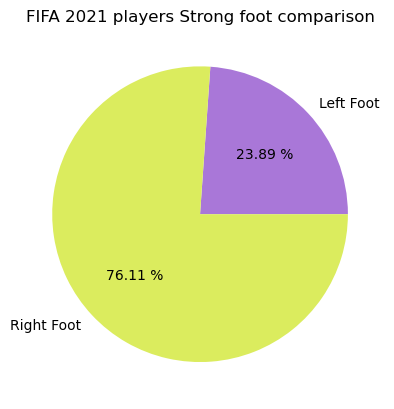

In [80]:
# left = df.loc[df['Preferred Foot']=='Left'].count()[0]
# right = df.loc[df['Preferred Foot']=='Right'].count()[0]


x = [left,right]
plt.title('FIFA 2021 players Strong foot comparison')
labels=['Left Foot','Right Foot']
colors=['#A977D8','#DBEC5E']

plt.pie(x , autopct='%.2f %%',colors=colors,labels=labels)

plt.show()

#### top 10 countries based on 'overall' (at least 30 players should be from that nation)

In [81]:
value_counts = df['Nationality'].value_counts()
common_values = value_counts[value_counts > 30].index
filtered_df = df[df['Nationality'].isin(common_values)]


top_10 = filtered_df.groupby('Nationality')['Overall'].mean().sort_values(ascending=False).head(10)
top_10 = top_10.reset_index()

top_10

,Nationality,Overall
0,Brazil,70.950395
1,Algeria,70.622642
2,Ukraine,70.507246
3,Russia,70.346154
4,Czech Republic,70.196262
5,Morocco,69.911392
6,Portugal,69.554017
7,Spain,69.342723
8,Italy,69.291990
9,Croatia,69.291045


#### Age Group vs overall analysis

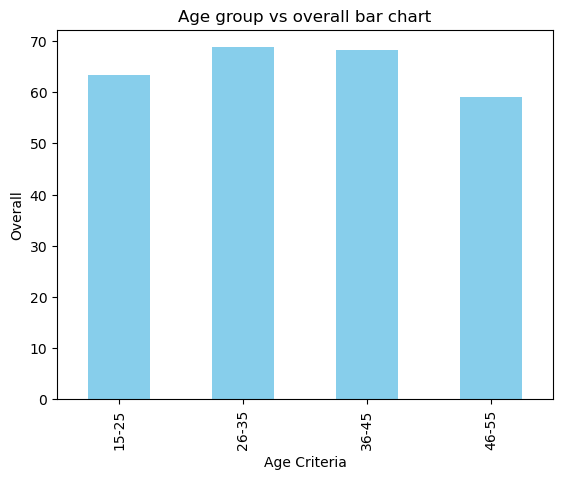

In [88]:
cat1 = df.loc[(df['Age'] >= 15) & (df['Age'] <= 25)]
cat2 = df.loc[(df['Age'] >= 26) & (df['Age'] <= 35)]
cat3 = df.loc[(df['Age'] >= 36) & (df['Age'] <= 45)]
cat4 = df.loc[(df['Age'] >= 46) & (df['Age'] <= 55)]

Category = ['15-25', '26-35', '36-45', '46-55']
Values = [cat1['Overall'].mean(), cat2['Overall'].mean(), cat3['Overall'].mean(), cat4['Overall'].mean()]

df_plt = pd.DataFrame({
    'Category': Category,
    'Values': Values
})

df_plt.plot(x='Category', y='Values', kind='bar', color='skyblue', legend=False)

plt.xlabel('Age Criteria')
plt.ylabel('Overall')
plt.title('Age group vs overall bar chart')

plt.show()

In [90]:
df.to_csv('Cleaned.csv' , index=False)